<a href="https://colab.research.google.com/github/chi19961026/Customer-Churn-Analysis/blob/main/Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries and methods/functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/2024 Summer Project/Machine Learning/Customer Churn Prediction_IBM data_240522/Dataset/Telco_customer_churn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
print(df.isnull().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [ ]:
display(df.describe())

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


From the above table i acquired following insights:

1. The total churn rate is 26.54%
2. Tenure Months and Monthly Charges seems fine, no extreme data needed to deal with
3. more than 50% of the customer has tenure more than 2 years(24 months)

# ML Data Preperation

In [ ]:
df_churn = df.drop(["CustomerID", "Count", "Country", "State", "City", "Zip Code", "Lat Long", "Latitude", "Longitude", "Churn Reason", "Gender", "Partner", "Phone Service", "Multiple Lines", "Streaming TV", "Streaming Movies", "Category"], axis = 1)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   object 
 1   Dependents         7043 non-null   object 
 2   Tenure Months      7043 non-null   int64  
 3   Internet Service   7043 non-null   object 
 4   Online Security    7043 non-null   object 
 5   Online Backup      7043 non-null   object 
 6   Device Protection  7043 non-null   object 
 7   Tech Support       7043 non-null   object 
 8   Contract           7043 non-null   object 
 9   Paperless Billing  7043 non-null   object 
 10  Payment Method     7043 non-null   object 
 11  Monthly Charges    7043 non-null   float64
 12  Total Charges      7043 non-null   object 
 13  Churn Label        7043 non-null   object 
 14  Churn Value        7043 non-null   int64  
 15  Churn Score        7043 non-null   int64  
 16  CLTV               7043 

In [ ]:
df_chrun_num = pd.get_dummies(df_churn, columns=['Senior Citizen', 'Dependents', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method'], drop_first = True)
df_chrun_num.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Senior Citizen_Yes,Dependents_Yes,Internet Service_Fiber optic,...,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,Yes,1,86,3239,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2,70.70,151.65,Yes,1,67,2701,False,True,True,...,False,False,False,False,False,False,True,False,True,False
2,8,99.65,820.5,Yes,1,86,5372,False,True,True,...,False,True,False,False,False,False,True,False,True,False
3,28,104.80,3046.05,Yes,1,84,5003,False,True,True,...,False,True,False,True,False,False,True,False,True,False
4,49,103.70,5036.3,Yes,1,89,5340,False,True,True,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
df_chrun_num['Total Charges'] = pd.to_numeric(df_chrun_num['Total Charges'], errors='coerce')
df_chrun_num.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Senior Citizen_Yes,Dependents_Yes,Internet Service_Fiber optic,...,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,Yes,1,86,3239,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2,70.70,151.65,Yes,1,67,2701,False,True,True,...,False,False,False,False,False,False,True,False,True,False
2,8,99.65,820.50,Yes,1,86,5372,False,True,True,...,False,True,False,False,False,False,True,False,True,False
3,28,104.80,3046.05,Yes,1,84,5003,False,True,True,...,False,True,False,True,False,False,True,False,True,False
4,49,103.70,5036.30,Yes,1,89,5340,False,True,True,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
df_chrun_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tenure Months                           7043 non-null   int64  
 1   Monthly Charges                         7043 non-null   float64
 2   Total Charges                           7032 non-null   float64
 3   Churn Label                             7043 non-null   object 
 4   Churn Value                             7043 non-null   int64  
 5   Churn Score                             7043 non-null   int64  
 6   CLTV                                    7043 non-null   int64  
 7   Senior Citizen_Yes                      7043 non-null   bool   
 8   Dependents_Yes                          7043 non-null   bool   
 9   Internet Service_Fiber optic            7043 non-null   bool   
 10  Internet Service_No                     7043 non-null   bool

In [ ]:
# Mapping dictionary
yes_no_mapping = {'Yes': True, 'No': False}
df_chrun_num['Churn Label'] = df_chrun_num['Churn Label'].map(yes_no_mapping)


In [ ]:
df_chrun_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tenure Months                           7043 non-null   int64  
 1   Monthly Charges                         7043 non-null   float64
 2   Total Charges                           7032 non-null   float64
 3   Churn Label                             7043 non-null   bool   
 4   Churn Value                             7043 non-null   int64  
 5   Churn Score                             7043 non-null   int64  
 6   CLTV                                    7043 non-null   int64  
 7   Senior Citizen_Yes                      7043 non-null   bool   
 8   Dependents_Yes                          7043 non-null   bool   
 9   Internet Service_Fiber optic            7043 non-null   bool   
 10  Internet Service_No                     7043 non-null   bool

In [ ]:
df_chrun_num.corr()

,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Senior Citizen_Yes,Dependents_Yes,Internet Service_Fiber optic,...,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
Tenure Months,1.000000,0.247900,0.825880,-0.352229,-0.352229,-0.224987,0.396406,0.016567,0.131376,0.019720,...,-0.039062,0.360653,-0.039062,0.324221,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852
Monthly Charges,0.247900,1.000000,0.651065,0.193356,0.193356,0.133754,0.098693,0.220173,-0.144206,0.787066,...,-0.763557,0.482692,-0.763557,0.338304,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437
Total Charges,0.825880,0.651065,1.000000,-0.199484,-0.199484,-0.124312,0.341837,0.102411,0.032184,0.360769,...,-0.374878,0.522881,-0.374878,0.432868,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Churn Label,-0.352229,0.193356,-0.199484,1.000000,1.000000,0.664897,-0.127463,0.150889,-0.248542,0.308020,...,-0.227890,-0.066160,-0.227890,-0.164674,-0.177820,-0.302253,0.191825,-0.134302,0.301919,-0.091683
Churn Value,-0.352229,0.193356,-0.199484,1.000000,1.000000,0.664897,-0.127463,0.150889,-0.248542,0.308020,...,-0.227890,-0.066160,-0.227890,-0.164674,-0.177820,-0.302253,0.191825,-0.134302,0.301919,-0.091683
Churn Score,-0.224987,0.133754,-0.124312,0.664897,0.664897,1.000000,-0.079782,0.102181,-0.174950,0.208687,...,-0.145542,-0.054870,-0.145542,-0.106300,-0.116724,-0.200508,0.129334,-0.085772,0.194603,-0.063099
CLTV,0.396406,0.098693,0.341837,-0.127463,-0.127463,-0.079782,1.000000,-0.003167,0.058222,0.011159,...,-0.011521,0.120394,-0.011521,0.119132,0.056364,0.233151,0.011501,0.078995,-0.070699,-0.092967
Senior Citizen_Yes,0.016567,0.220173,0.102411,0.150889,0.150889,0.102181,-0.003167,1.000000,-0.174396,0.255338,...,-0.182742,0.059428,-0.182742,-0.060625,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477
Dependents_Yes,0.131376,-0.144206,0.032184,-0.248542,-0.248542,-0.174950,0.058222,-0.174396,1.000000,-0.162353,...,0.172110,-0.022343,0.172110,0.028811,0.014680,0.190262,-0.118963,0.041254,-0.141476,0.071056
Internet Service_Fiber optic,0.019720,0.787066,0.360769,0.308020,0.308020,0.208687,0.011159,0.255338,-0.162353,1.000000,...,-0.465793,0.176049,-0.465793,-0.020492,-0.076324,-0.211526,0.326853,-0.050077,0.336410,-0.306834


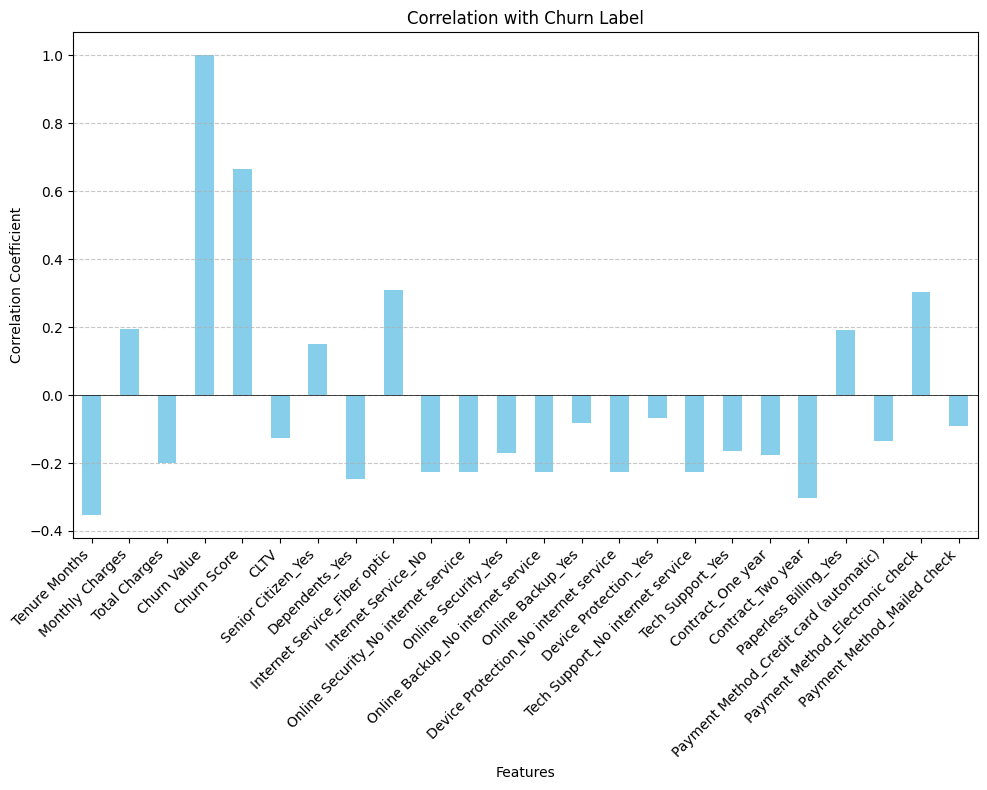

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_chrun_num.corr()

# Isolate the 'Churn Label' correlations
churn_label_corr = corr_matrix['Churn Label']

import matplotlib.pyplot as plt

# Remove the 'Churn Label' self-correlation (value of 1)
churn_label_corr = churn_label_corr.drop('Churn Label', errors='ignore')

# Create a bar chart
plt.figure(figsize=(10, 8))
churn_label_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation with Churn Label')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.5)  # Adds a line at y=0 for reference
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for easier reading of values
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


### Churn rate under different contract type

In [ ]:
# Convert 'Churn Label' to a numerical format: 1 for 'Yes', 0 for 'No'
df_churn['Churn Label'] = df_churn['Churn Label'].map({'Yes': 1, 'No': 0})
# Create a pivot table
pivot_table = df_churn.pivot_table(index='Contract', values='Churn Label', aggfunc=['count', 'sum'])
pivot_table.columns = ['Total Customers', 'Churned Customers']
# Calculate churn percentage
pivot_table['Churn Percentage'] = (pivot_table['Churned Customers'] / pivot_table['Total Customers']) * 100
print(pivot_table)


                Total Customers  Churned Customers  Churn Percentage
Contract                                                            
Month-to-month             3875               1655         42.709677
One year                   1473                166         11.269518
Two year                   1695                 48          2.831858


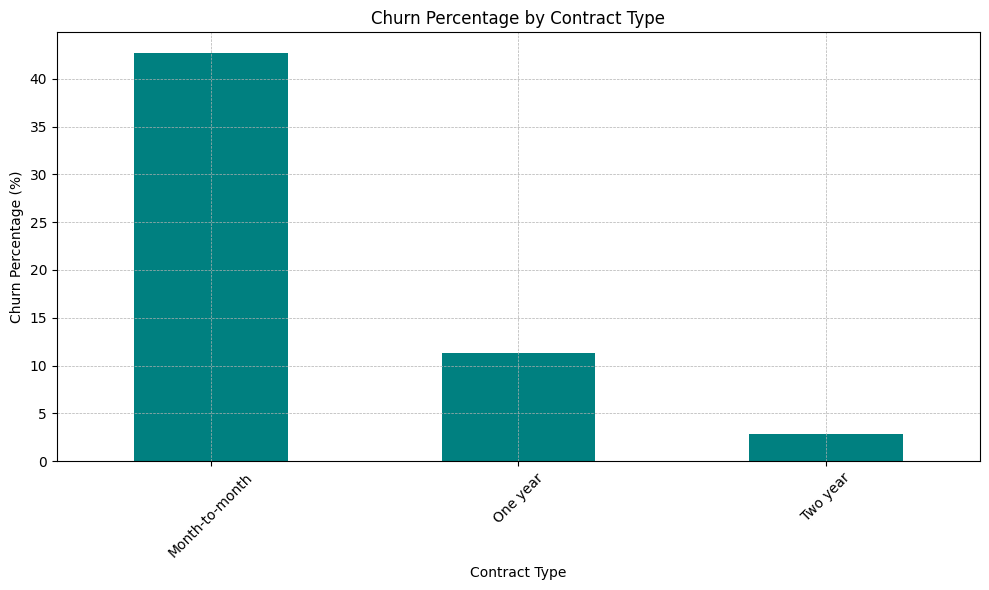

In [ ]:
import matplotlib.pyplot as plt

# Plotting
pivot_table['Churn Percentage'].plot(kind='bar', color='teal', figsize=(10, 6))
plt.title('Churn Percentage by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Percentage (%)')
plt.xticks(rotation=45)  # Rotate the contract type labels for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust layout
plt.show()


In [ ]:
# Create a pivot table
pivot_table = df_churn.pivot_table(index=['Contract','Tenure Months'] , values='Churn Label', aggfunc=['count', 'sum'])
pivot_table.columns = ['Total Customers', 'Churned Customers']

# Calculate churn percentage
pivot_table['Churn Percentage'] = (pivot_table['Churned Customers'] / pivot_table['Total Customers']) * 100
print(pivot_table)

                              Total Customers  Churned Customers  \
Contract       Tenure Months                                       
Month-to-month 1                          604                380   
               2                          230                121   
               3                          191                 94   
               4                          165                 82   
               5                          128                 63   
...                                       ...                ...   
Two year       68                          65                  2   
               69                          66                  2   
               70                          88                  5   
               71                         137                  5   
               72                         343                  4   

                              Churn Percentage  
Contract       Tenure Months                    
Month-to-month 1 

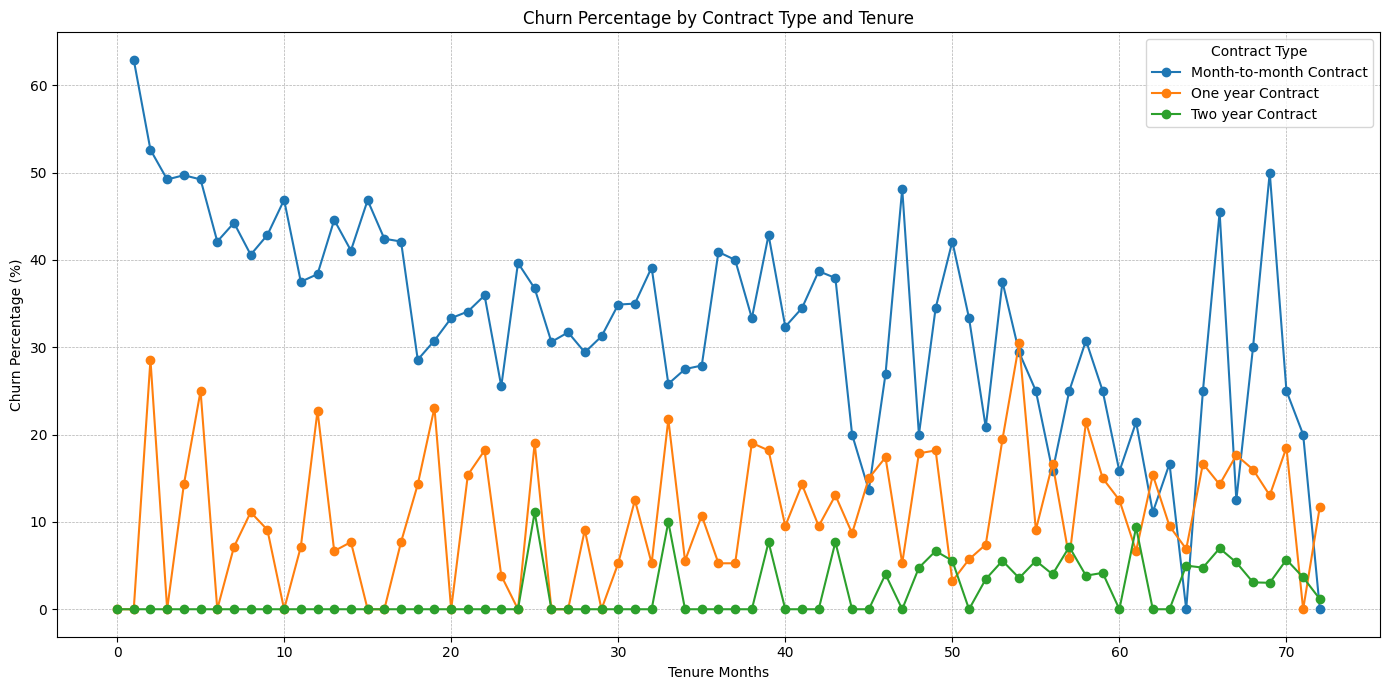

In [ ]:
# Create a figure and axis for the plot
plt.figure(figsize=(14, 7))

# Plot each contract type
for contract_type in ['Month-to-month', 'One year', 'Two year']:
    data_to_plot = pivot_table.xs(contract_type, level='Contract')
    plt.plot(data_to_plot.index, data_to_plot['Churn Percentage'], marker='o', linestyle='-', label=f'{contract_type} Contract')

# Adding titles and labels
plt.title('Churn Percentage by Contract Type and Tenure')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Percentage (%)')
plt.legend(title='Contract Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()  # Adjust layout
plt.show()


# Customer Churn Label (Binary Classification)

## Standardize & Split the data

In [ ]:
print(df_chrun_num.isnull().sum())

Tenure Months                              0
Monthly Charges                            0
Total Charges                             11
Churn Label                                0
Churn Value                                0
Churn Score                                0
CLTV                                       0
Senior Citizen_Yes                         0
Dependents_Yes                             0
Internet Service_Fiber optic               0
Internet Service_No                        0
Online Security_No internet service        0
Online Security_Yes                        0
Online Backup_No internet service          0
Online Backup_Yes                          0
Device Protection_No internet service      0
Device Protection_Yes                      0
Tech Support_No internet service           0
Tech Support_Yes                           0
Contract_One year                          0
Contract_Two year                          0
Paperless Billing_Yes                      0
Payment Me

In [ ]:
# Fill NaN values with the mean, and update the DataFrame in place
df_chrun_num['Total Charges'].fillna(df_chrun_num['Total Charges'].mean(), inplace=True)

In [ ]:
features = df_chrun_num.drop(["Churn Label", "Churn Value", "Churn Score"], axis = 1)

target = df_chrun_num["Churn Label"]

# standard scaling: prepare the standardized values of the input features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test =  train_test_split(features_scaled, target, test_size=0.2, random_state=42,stratify=target)

# Model Selection

## Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state=42).fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

[[915 120]
 [160 214]]
              precision    recall  f1-score   support

       False       0.85      0.88      0.87      1035
        True       0.64      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



Precision v.s. Recall:

**Recall** (Sensitivity): This metric is crucial if the cost of missing a customer who might churn (false negative) is high. A high recall for the "True" class means that the model successfully identifies a large proportion of all actual churners.

Precision: This metric is important if the cost of wrongly predicting that a customer will churn (false positive) is high. High precision means that when the model predicts churn, it is likely to be correct.


In [ ]:
from sklearn.model_selection import cross_val_score

# Create the logistic regression model
logreg_cv = LogisticRegression(random_state=42)

# Perform cross-validation using recall as the scoring metric
scores_recall = cross_val_score(logreg_cv, features_scaled, target, cv=5, scoring='recall')
scores_accuracy = cross_val_score(logreg_cv, features_scaled, target, cv=5, scoring='accuracy')

# Print the mean recall across all folds
print("Mean cross-validation recall: ", scores_recall.mean())
print("Mean cross-validation accuracy: ", scores_accuracy.mean())

Mean cross-validation recall:  0.5799716133102034
Mean cross-validation accuracy:  0.8077531211691078


## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[917 118]
 [188 186]]
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1035
        True       0.61      0.50      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [ ]:
rf_cv = RandomForestClassifier(random_state=42)

rf_scores_accuracy = cross_val_score(rf_cv, features_scaled, target, cv=5, scoring='accuracy')
rf_scores_recall = cross_val_score(rf_cv, features_scaled, target, cv=5, scoring='recall')


# Print the mean recall across all folds
print("Mean cross-validation recall: ", rf_scores_recall.mean())
print("Mean cross-validation accuracy: ", rf_scores_accuracy.mean())

Mean cross-validation recall:  0.4997433728548695
Mean cross-validation accuracy:  0.7881607281114911


## KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[915 120]
 [194 180]]
              precision    recall  f1-score   support

       False       0.83      0.88      0.85      1035
        True       0.60      0.48      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [ ]:
knn_cv = KNeighborsClassifier()

knn_scores_accuracy = cross_val_score(knn_cv, features_scaled, target, cv=5, scoring='accuracy')
knn_scores_recall = cross_val_score(knn_cv, features_scaled, target, cv=5, scoring='recall')


# Print the mean recall across all folds
print("Mean cross-validation recall: ", knn_scores_recall.mean())
print("Mean cross-validation accuracy: ", knn_scores_accuracy.mean())

Mean cross-validation recall:  0.5377227566629869
Mean cross-validation accuracy:  0.7776529937415317


## Logistic Regression v.s. Random Forest v.s. KNN

In [ ]:
import pandas as pd

# Create a DataFrame to hold the data
data = {
    "Model": ["Logistic Regression", "Random Forest", "K-Nearest Neighbors"],
    "Mean Cross-Validation Recall": [scores_recall.mean(), rf_scores_recall.mean(), knn_scores_recall.mean()],
    "Mean Cross-Validation Accuracy": [scores_accuracy.mean(), rf_scores_accuracy.mean(), knn_scores_accuracy.mean()]
}

results_table = pd.DataFrame(data)

# Print the results table
display(results_table)


,Model,Mean Cross-Validation Recall,Mean Cross-Validation Accuracy
0,Logistic Regression,0.579972,0.807753
1,Random Forest,0.499743,0.788161
2,K-Nearest Neighbors,0.537723,0.777653


# Model Training

## Deal with Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

vif_data = pd.DataFrame()
vif_data["feature"] = features_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(features_scaled_df.values, i) for i in range(features_scaled_df.shape[1])]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                   feature        VIF
0                            Tenure Months   7.248468
1                          Monthly Charges  14.219357
2                            Total Charges  10.479114
3                                     CLTV   1.193071
4                       Senior Citizen_Yes   1.125370
5                           Dependents_Yes   1.090941
6             Internet Service_Fiber optic   5.474308
7                      Internet Service_No        inf
8      Online Security_No internet service        inf
9                      Online Security_Yes   1.487540
10       Online Backup_No internet service        inf
11                       Online Backup_Yes   1.501620
12   Device Protection_No internet service        inf
13                   Device Protection_Yes   1.628910
14        Tech Support_No internet service        inf
15                        Tech Support_Yes   1.615728
16                       Contract_One year   1.605783
17                       Con

remove 'Monthly Charges'

In [ ]:
features = df_chrun_num.drop(["Churn Label", "Churn Value", "Churn Score", "Monthly Charges"], axis = 1)

target = df_chrun_num["Churn Label"]

# standard scaling: prepare the standardized values of the input features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test =  train_test_split(features_scaled, target, test_size=0.2, random_state=42,stratify=target)


logreg = LogisticRegression(random_state=42).fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

[[916 119]
 [156 218]]
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1035
        True       0.65      0.58      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [ ]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

vif_data = pd.DataFrame()
vif_data["feature"] = features_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(features_scaled_df.values, i) for i in range(features_scaled_df.shape[1])]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                   feature       VIF
0                            Tenure Months  6.619941
1                            Total Charges  8.265410
2                                     CLTV  1.192813
3                       Senior Citizen_Yes  1.125359
4                           Dependents_Yes  1.090768
5             Internet Service_Fiber optic  2.215004
6                      Internet Service_No       inf
7      Online Security_No internet service       inf
8                      Online Security_Yes  1.457870
9        Online Backup_No internet service       inf
10                       Online Backup_Yes  1.464523
11   Device Protection_No internet service       inf
12                   Device Protection_Yes  1.515719
13        Tech Support_No internet service       inf
14                        Tech Support_Yes  1.535394
15                       Contract_One year  1.602056
16                       Contract_Two year  2.587289
17                   Paperless Billing_Yes  1.

remove Internet Service_No, Online Security_No internet service

In [ ]:
features = df_chrun_num.drop(["Churn Label", "Churn Value", "Churn Score", "Monthly Charges", "Online Security_No internet service", "Online Backup_No internet service", "Device Protection_No internet service", "Tech Support_No internet service"], axis = 1)

target = df_chrun_num["Churn Label"]

# standard scaling: prepare the standardized values of the input features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train_f, X_test_f, y_train_f, y_test_f =  train_test_split(features_scaled, target, test_size=0.2, random_state=42,stratify=target)


logreg = LogisticRegression(random_state=42).fit(X_train_f, y_train_f)
logreg_pred = logreg.predict(X_test_f)

print(confusion_matrix(y_test_f, logreg_pred))
print(classification_report(y_test_f, logreg_pred))

[[916 119]
 [156 218]]
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1035
        True       0.65      0.58      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [ ]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

vif_data = pd.DataFrame()
vif_data["feature"] = features_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(features_scaled_df.values, i) for i in range(features_scaled_df.shape[1])]

print(vif_data)

                                   feature       VIF
0                            Tenure Months  6.619941
1                            Total Charges  8.265410
2                                     CLTV  1.192813
3                       Senior Citizen_Yes  1.125359
4                           Dependents_Yes  1.090768
5             Internet Service_Fiber optic  2.215004
6                      Internet Service_No  2.443777
7                      Online Security_Yes  1.457870
8                        Online Backup_Yes  1.464523
9                    Device Protection_Yes  1.515719
10                        Tech Support_Yes  1.535394
11                       Contract_One year  1.602056
12                       Contract_Two year  2.587289
13                   Paperless Billing_Yes  1.199241
14  Payment Method_Credit card (automatic)  1.559705
15         Payment Method_Electronic check  1.961853
16             Payment Method_Mailed check  1.848527


## Logistic-Regression: Improving the recall for the "True" class by


### 1. Adjusting the Decision Threshold

Threshold: 0.5, Accuracy: 0.80
Threshold: 0.4, Accuracy: 0.78
Threshold: 0.3, Accuracy: 0.76
Threshold: 0.2, Accuracy: 0.71


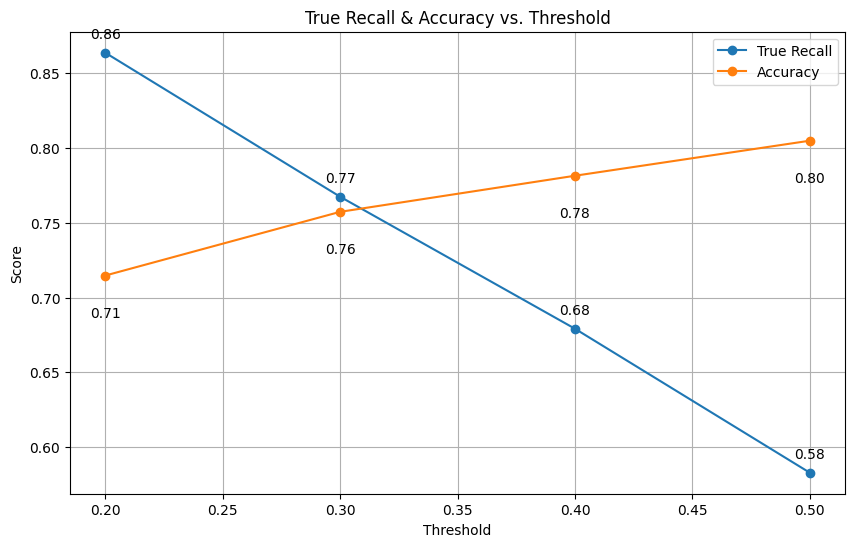

In [ ]:
from sklearn.metrics import recall_score, f1_score, classification_report, confusion_matrix

# Predict probabilities
probabilities = logreg.predict_proba(X_test_f)[:, 1]

# Define thresholds
thresholds = [0.5, 0.4, 0.3, 0.2]

# Lists to store results
true_recall_scores = []
accuracy_scores = []

# Calculate True Recall, F1 Score, and Accuracy for each threshold
for threshold in thresholds:
    logreg_pred = (probabilities >= threshold).astype(int)
    report = classification_report(y_test_f, logreg_pred, output_dict=True)
    true_recall_scores.append(report['True']['recall'])
    accuracy_scores.append(report['accuracy'])

# Print accuracy values for each threshold
for threshold, accuracy in zip(thresholds, accuracy_scores):
    print(f"Threshold: {threshold}, Accuracy: {accuracy:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, true_recall_scores, marker='o', label='True Recall')
plt.plot(thresholds, accuracy_scores, marker='o', label='Accuracy')

# Annotate the values on the chart
for i, threshold in enumerate(thresholds):
    plt.annotate(f"{true_recall_scores[i]:.2f}", (threshold, true_recall_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f"{accuracy_scores[i]:.2f}", (threshold, accuracy_scores[i]), textcoords="offset points", xytext=(0,-30), ha='center')


plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('True Recall & Accuracy vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


### 2. Using Class Weight

In [ ]:
# Apply class weights
logreg = LogisticRegression(random_state=42, class_weight={0:1, 1:4})  # Increasing the weight of the 'True' class
logreg.fit(X_train_f, y_train_f)
logreg_pred = logreg.predict(X_test_f)


print(confusion_matrix(y_test_f, logreg_pred))
print(classification_report(y_test_f, logreg_pred))

[[677 358]
 [ 49 325]]
              precision    recall  f1-score   support

       False       0.93      0.65      0.77      1035
        True       0.48      0.87      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.81      0.71      0.73      1409



### 3. Resampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_f, y_train_f)

# Retrain the model
logreg.fit(X_train_resampled, y_train_resampled)
logreg_pred = logreg.predict(X_test_f)

print(confusion_matrix(y_test_f, logreg_pred))
print(classification_report(y_test_f, logreg_pred))

[[512 523]
 [ 14 360]]
              precision    recall  f1-score   support

       False       0.97      0.49      0.66      1035
        True       0.41      0.96      0.57       374

    accuracy                           0.62      1409
   macro avg       0.69      0.73      0.61      1409
weighted avg       0.82      0.62      0.63      1409



From the above three methods that can improve the True Recall Rate, I decided to use the adjusting threshold method because it not only increases the model's True Recall Rate but also decreases the accuracy rate only slightly compared to other methods.

# Model Evaluation

### Confusion Matrix & Classification Report

In [ ]:
# threshold = 0.3 has 4% lower accuracy rate but 20% higher True Recall rate

logreg_pred = (probabilities >= 0.3).astype(int)

print(confusion_matrix(y_test_f, logreg_pred))
print(classification_report(y_test_f, logreg_pred))

[[780 255]
 [ 87 287]]
              precision    recall  f1-score   support

       False       0.90      0.75      0.82      1035
        True       0.53      0.77      0.63       374

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



The Confusion Matrix shows that the logistic regression model with a threshold of 0.3 can accurately predict 287 churn customers out of a total of 374, which is a 77% True Recall rate.

The model's accuracy rate is 76%, indicating that out of 1409 customers, the model is able to correctly classify 76% of these customers into churn and non-churn categories.

### ROC-AUC

0.8456741326306544


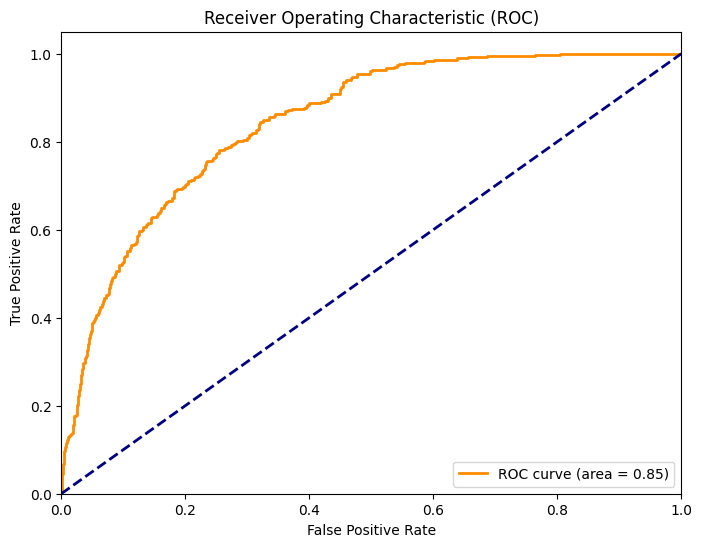

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test set
probabilities = logreg.predict_proba(X_test_f)[:, 1]

# Calculate ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_f, probabilities)
roc_auc = roc_auc_score(y_test_f, probabilities)
print(roc_auc)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


The model has a relatively high True Recall Rate of 77%, which is crucial for churn prediction. This indicates that among churned customers, the model is able to predict 77% of them accurately.

I deliberately lowered the threshold from 0.5 to 0.3 to increase the True Recall Rate without sacrificing too much accuracy, which decreased from 80% to 76%. This is because missing a churn customer is more costly than incorrectly predicting churn. As previously mentioned, the cost of acquiring a new customer is five times more than retaining an existing one.

The ROC-AUC of 85% means that the model is capable of distinguishing between churn and non-churn customers effectively.

# Conclusion:
**Logistic Regression Classification** shows the better accuracy rate and recall rate compare to Random forest and KNN